<a href="https://colab.research.google.com/github/karthikeyan0726/2348524_dl-lab/blob/main/2348524_Lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Perceptron Learning Algorithm Implementation for Boolean Functions

# Define the activation function
def activation_function(x):
    return 1 if x >= 0 else 0

In [ ]:
# Perceptron learning algorithm
def perceptron_learning_algorithm(inputs, outputs, weights, learning_rate, epochs):
    errors = []
    for _ in range(epochs):
        total_error = 0
        for input_vector, output in zip(inputs, outputs):
            prediction = activation_function(np.dot(input_vector, weights))
            error = output - prediction
            total_error += error ** 2
            weights += learning_rate * error * input_vector
        errors.append(total_error)
    return weights, errors

In [ ]:
# Train and display results for each boolean function
def train_boolean_function(name, input_data, output_data, epochs, learning_rate):
    initial_weights = np.random.rand(2)
    optimized_weights, errors = perceptron_learning_algorithm(input_data, output_data, initial_weights, learning_rate, epochs)
    print(f"Optimal weights for {name}: {optimized_weights}, Errors: {errors}")

    # Visualize the learning progress
    plt.plot(range(1, len(errors) + 1), errors)
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title(f'Learning Progress for {name}')
    plt.show()

In [ ]:
# Define the boolean functions as truth tables
boolean_functions = {
    "AND": (np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 0, 0, 1])),
    "OR": (np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 1, 1, 1])),
    "NAND": (np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([1, 1, 1, 0])),
    "XOR": (np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 1, 1, 0]))
}


Optimal weights for AND: [0.06641456 0.07438356], Errors: [3, 3, 3, 3, 3, 3, 3, 2, 3, 4]


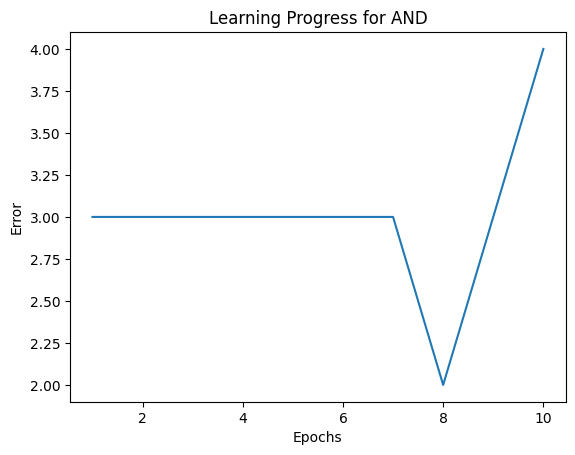

Optimal weights for OR: [0.77934024 0.82211534], Errors: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


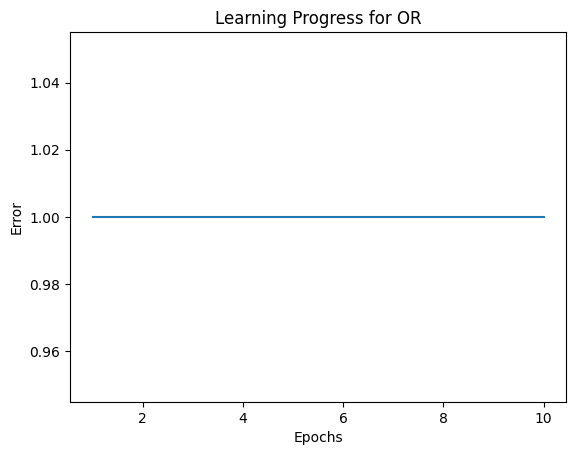

Optimal weights for NAND: [-0.02028709 -0.06283747], Errors: [1, 1, 1, 1, 1, 2, 2, 2, 2, 2]


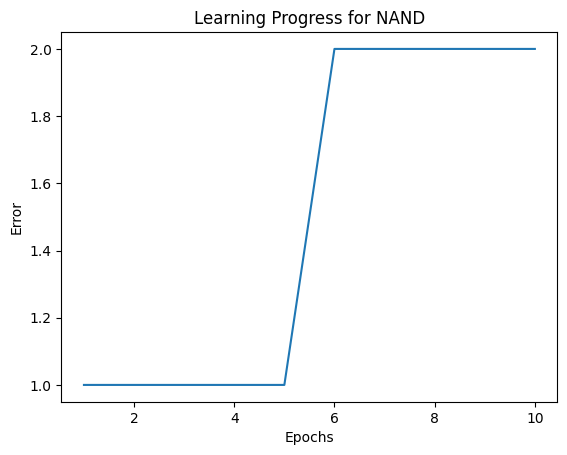

Optimal weights for XOR: [-0.04674901 -0.03824252], Errors: [2, 2, 2, 3, 3, 3, 3, 3, 3, 3]


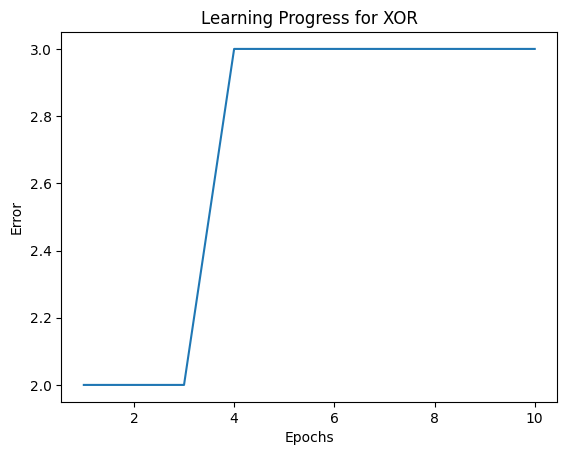

In [ ]:
# Train and visualize the results for each boolean function
for name, data in boolean_functions.items():
    train_boolean_function(name, data[0], data[1], epochs=10, learning_rate=0.1)


# Gradient Descent Algorithm Implementation for Equations

# Define the function f(x) = x^2 - 2x + 2
def f(x):
    return x**2 - 2*x + 2

# Define the gradient of the function f'(x) = 2x - 2
def grad_f(x):
    return 2*x - 2


In [ ]:
# Define the gradient descent function
def gradient_descent(func, grad, start, lr, eps, max_iter):
    x = start
    fx = func(x)
    norm = np.abs(grad(x))
    x_list = [x]
    fx_list = [fx]
    norm_list = [norm]
    iter = 0
    while norm > eps and iter < max_iter:
        x = x - lr * grad(x)
        fx = func(x)
        norm = np.abs(grad(x))
        x_list.append(x)
        fx_list.append(fx)
        norm_list.append(norm)
        iter += 1
    return x_list, fx_list, norm_list, iter

In [ ]:
# Apply the gradient descent for the function
lr = 0.1
eps = 1e-6
max_iter = 1000
start = 5
x_list, fx_list, norm_list, iter = gradient_descent(f, grad_f, start, lr, eps, max_iter)

# Print the results
print(f"The minimum of f(x) is {fx_list[-1]} at x = {x_list[-1]}")
print(f"The number of iterations is {iter}")

The minimum of f(x) is 1.0000000000001774 at x = 1.0000004212491667
The number of iterations is 72


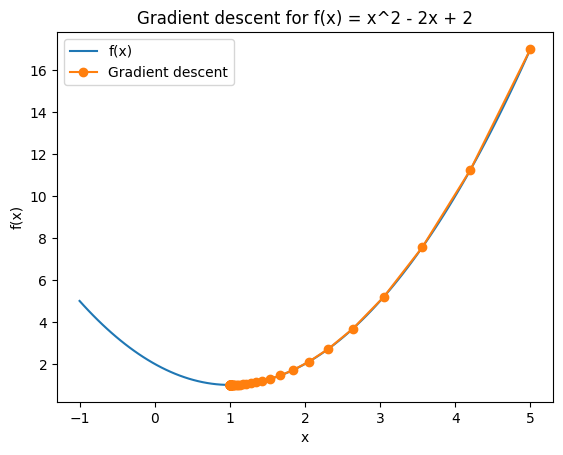

In [ ]:
# Plot the graph of f(x) and the points visited by the gradient descent
x = np.linspace(-1, 5, 100)
y = f(x)
plt.plot(x, y, label="f(x)")
plt.plot(x_list, fx_list, 'o-', label="Gradient descent")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient descent for f(x) = x^2 - 2x + 2")
plt.legend()
plt.show()

In [ ]:
# Define the function f(x, y) = (1 - x)^2 + 100(y - x^2)^2
def f(x, y):
    return (1 - x)**2 + 100*(y - x**2)**2


In [ ]:
# Define the gradient of the function as a vector [f'_x, f'_y]
def grad_f(x, y):
    return np.array([-2*(1 - x) - 400*x*(y - x**2), 200*(y - x**2)])

# Define the gradient descent function
def gradient_descent(func, grad, start, lr, eps, max_iter):
    x = start
    fx = func(*x)
    norm = np.linalg.norm(grad(*x))
    x_list = [x]
    fx_list = [fx]
    norm_list = [norm]
    iter = 0
    while norm > eps and iter < max_iter:
        x = x - lr * grad(*x)
        fx = func(*x)
        norm = np.linalg.norm(grad(*x))
        x_list.append(x)
        fx_list.append(fx)
        norm_list.append(norm)
        iter += 1
    return x_list, fx_list, norm_list, iter


The minimum of f(x, y) is 3.139992492505519e-05 at (x, y) = [0.99440095 0.98881076]
The number of iterations is 10000


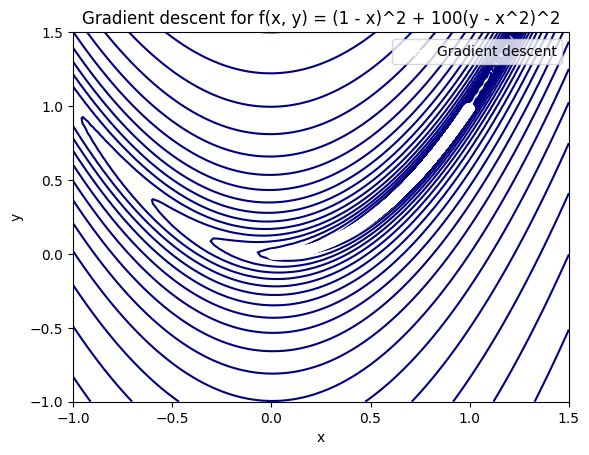

In [ ]:
# Apply the gradient descent for the function f(x, y)
lr = 0.001
eps = 1e-6
max_iter = 10000
start = np.array([0, 0])
x_list, fx_list, norm_list, iter = gradient_descent(f, grad_f, start, lr, eps, max_iter)

# Print the results
print(f"The minimum of f(x, y) is {fx_list[-1]} at (x, y) = {x_list[-1]}")
print(f"The number of iterations is {iter}")

# Plot the graph of f(x, y) and the points visited by the gradient descent
x = np.linspace(-1, 1.5, 100)
y = np.linspace(-1, 1.5, 100)
x, y = np.meshgrid(x, y)
z = f(x, y)
plt.contour(x, y, z, levels=np.logspace(-1, 5, 35), cmap='jet')
plt.plot(*zip(*x_list), '-o', color='white', label="Gradient descent")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gradient descent for f(x, y) = (1 - x)^2 + 100(y - x^2)^2")
plt.legend()
plt.show()